In [29]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms

In [6]:
# Dowload the dataset
project_name='05-cifar10-cnn'
dataset_url = "http://files.fast.ai/data/cifar10.tgz"
download_url(dataset_url, '.')



0it [00:00, ?it/s]Downloading http://files.fast.ai/data/cifar10.tgz to ./cifar10.tgz


HTTPError: HTTP Error 403: Forbidden

In [30]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testLoader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


Files already downloaded and verified


In [31]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainLoader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [32]:
data_dir = './data/cifar-10-batches-py/'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['readme.html', 'data_batch_5', 'data_batch_1', 'data_batch_2', 'batches.meta', 'data_batch_3', 'data_batch_4', 'test_batch']


FileNotFoundError: [Errno 2] No such file or directory: './data/cifar-10-batches-py//train'

In [33]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

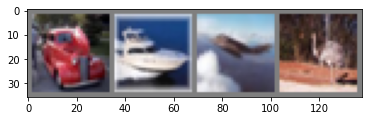

NameError: name 'classes' is not defined

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 +0.5 #unnormalize
    npimg=img.numpy()

    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

#gets random images
dataiter = iter(trainLoader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))

#print labels
print (" ".join("%5s" % classes[labels[j]] for j in range(4)))